## 한글 글꼴 설치 & Data Load

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,162 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
import seaborn as sns
import datetime as dt

In [ ]:
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] =16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
duration = pd.read_excel('/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/외래객 평균 체재일/외래객 평균 체재일.xls',na_values=np.nan,header=[0],index_col=[0])
df2 = pd.read_excel('/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/외래객 평균 체재일/국적별 입국자 수.xls',na_values=np.nan,header=[0],index_col=[0])
C_entrance = pd.read_excel('/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/소현/국적별 입국_210126101506.xlsx',index_col=[0])
income= pd.read_excel("/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/소현/관광수지_관광수입.xlsx")
abroad = pd.read_excel("/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/소현/국민해외관광객_전체.xlsx")

#### 2019년 기준, 입국자 기준 Top 10 국가 리스트 추출

In [ ]:
df2 = df2.iloc[1:,:]
df2.head()

,2019년,2020년,계
국적별,,,
일 본,3271706,429791,3701497
중 국,6023021,678443,6701464
대 만,1260493,166452,1426945
필리핀,503867,105978,609845
홍 콩,694934,88819,783753


In [ ]:
df2.shape

(61, 3)

In [ ]:
df2 = df2.sort_values(by=['2019년'],axis=0,ascending=False)
# df2 = df2.head(10)
top_cntry = []
for i in df2.index[:10]:
    top_cntry.append(i)

top_cntry

['중  국',
 '일  본',
 '대  만',
 '미  국',
 '홍  콩',
 '태  국',
 '베트남',
 '필리핀',
 '말레이시아',
 '러시아(연방)']

#### 체류기간(Duration Data) 전처리

In [ ]:
duration = duration.iloc[1:,:-2]
duration = duration.astype('float32')

In [ ]:
new_col = []
for col in duration.columns:
    col = col.replace('년','.')
    col = col.replace('월','.01')
    new_col.append(col)

new_col = pd.to_datetime(new_col)
duration.columns=new_col

In [ ]:
duration

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
국적,,,,,,,,,,,,,,,,,,,,,,,
아시아주,9.3,8.400000,6.500000,7.2,7.800000,7.700000,8.300000,8.600000,8.2,7.4,8.700000,9.000000,8.600000,8.300000,32.000000,48.700001,42.000000,25.500000,15.600000,19.600000,20.500000,23.799999,21.600000
일 본,3.1,3.500000,3.100000,3.0,3.100000,3.000000,3.300000,3.800000,3.5,3.4,3.700000,3.900000,3.300000,3.400000,10.400000,57.599998,73.599998,64.300003,36.700001,43.500000,44.500000,47.099998,43.200001
중 국,14.2,11.900000,9.100000,10.7,11.000000,10.600000,11.200000,10.900000,10.3,9.1,11.200000,11.600000,12.100000,19.000000,43.400002,63.700001,54.400002,58.700001,47.599998,43.400002,37.799999,44.099998,46.200001
대 만,4.8,4.900000,4.400000,4.2,4.400000,4.300000,4.500000,5.000000,4.4,4.4,4.700000,4.600000,5.000000,5.300000,33.099998,65.099998,71.000000,55.900002,34.599998,37.799999,34.299999,44.400002,47.099998
필리핀,6.6,6.600000,6.800000,5.5,6.600000,6.900000,8.300000,9.200000,8.4,6.1,6.600000,7.100000,6.300000,6.500000,11.800000,18.500000,19.900000,13.300000,12.200000,10.600000,7.000000,7.600000,7.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이집트,22.0,16.600000,14.200000,15.9,21.799999,12.200000,18.000000,20.000000,17.4,13.4,14.000000,20.900000,20.299999,19.000000,25.299999,0.000000,58.000000,56.000000,11.200000,17.500000,47.599998,55.400002,44.299999
아프리카주 기타,29.5,22.700001,21.700001,20.4,22.700001,19.900000,21.799999,20.299999,20.6,21.6,22.500000,30.200001,27.000000,21.200001,34.599998,24.799999,15.700000,38.799999,8.400000,22.000000,9.200000,28.100000,24.900000
기 타,20.4,19.700001,16.200001,17.9,15.800000,25.200001,14.300000,25.799999,20.0,16.9,23.700001,14.000000,10.000000,11.900000,10.400000,0.000000,41.500000,1.000000,1.800000,14.000000,9.300000,0.000000,2.000000


In [ ]:
duration = duration.loc[top_cntry].transpose()
# duration = duration.reset_index().rename(columns={'index':'date'})

In [ ]:
duration.head()

국적,중 국,일 본,대 만,미 국,홍 콩,태 국,베트남,필리핀,말레이시아,러시아(연방)
2019-01-01,14.2,3.1,4.8,11.9,4.9,8.9,18.4,6.6,7.8,10.7
2019-02-01,11.9,3.5,4.9,13.3,4.9,10.0,11.2,6.6,6.4,13.2
2019-03-01,9.1,3.1,4.4,11.5,4.3,8.7,10.4,6.8,6.0,11.3
2019-04-01,10.7,3.0,4.2,10.1,4.5,7.4,7.7,5.5,6.2,11.0
2019-05-01,11.0,3.1,4.4,12.9,4.7,9.1,14.0,6.6,7.6,11.9


#### 국적별 입국자 수 전처리

In [ ]:
C_entrance = C_entrance.loc[top_cntry]
C_entrance = C_entrance.iloc[:,:-1]

In [ ]:
C_entrance.head()

,2019년01월,2019년02월,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,2020년01월,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월
국적별,,,,,,,,,,,,,,,,,,,,,,,
중 국,392814,453379,487623,493250,500413,475007,519132,578112,541350,567695,505369,508877,481681,104086,16595,3935,5124,5051,9738,16275,15307,11477,9174
일 본,206526,213200,375119,290092,286273,282476,274830,329652,251119,248541,258522,255356,203969,211199,8347,360,413,498,755,1275,794,927,1254
대 만,87954,94559,98510,113072,101779,118437,113587,109273,102758,127944,102241,90379,110354,53042,585,155,189,240,305,655,329,299,299
미 국,62737,57732,84275,102524,95815,105398,97428,86586,90819,101099,82238,77387,67255,42439,10570,6417,8735,9717,11922,13368,12426,12366,13100
홍 콩,35896,51312,46068,76104,57026,61728,59036,65958,45911,65544,58600,71751,66962,20966,262,35,24,62,78,167,115,59,89


In [ ]:
new_col = []
for col in C_entrance.columns:
    col = col.replace('년','.')
    col = col.replace('월','.01')
    new_col.append(col)

new_col = pd.to_datetime(new_col)
C_entrance.columns=new_col

In [ ]:
C_entrance = C_entrance.transpose()
C_entrance['total'] = C_entrance.sum(axis=1) # Top 10 국가 월별 입국자 수
# C_entrance = C_entrance.reset_index().rename(columns={'index':'date'})

In [ ]:
C_entrance.head()

국적별,중 국,일 본,대 만,미 국,홍 콩,태 국,베트남,필리핀,말레이시아,러시아(연방),total
2019-01-01,392814,206526,87954,62737,35896,41334,20183,30473,22065,25194,925176
2019-02-01,453379,213200,94559,57732,51312,39220,42181,29294,27484,20001,1028362
2019-03-01,487623,375119,98510,84275,46068,53100,46991,38701,40789,27992,1299168
2019-04-01,493250,290092,113072,102524,76104,69726,63169,66525,43726,34205,1352393
2019-05-01,500413,286273,101779,95815,57026,52660,44416,50569,31217,32955,1253123


#### 코로나 확진자 수 전처리

In [ ]:
# 코로나 일별 확진자 (2/20 ~ 12/08)
CovidN = pd.read_csv('/content/drive/MyDrive/SNU_Fintech/SNU - 5조/Covid-19 관광객 분석(~1 31)/외래객 평균 체재일/daily_corona_conut.csv',index_col=[0])
CovidN['date'] = '2020/' + CovidN['date']
CovidN['date'] = pd.to_datetime(CovidN.date,format='%Y-%m-%d')
CovidN.set_index('date',inplace=True)
CovidN = CovidN.resample('MS').mean()
CovidN.rename(columns={'count':'월별 평균 확진자'},inplace=True)

In [ ]:
CovidN.head()

,월별 평균 확진자
date,
2020-02-01,311.900000
2020-03-01,214.064516
2020-04-01,32.933333
2020-05-01,23.516129
2020-06-01,44.900000


#### 명목/실질 관광객 수 연산

In [ ]:
duration.iloc[10:14]

국적,중 국,일 본,대 만,미 국,홍 콩,태 국,베트남,필리핀,말레이시아,러시아(연방)
2019-11-01,11.2,3.7,4.7,13.6,4.6,8.3,17.799999,6.6,7.3,12.4
2019-12-01,11.6,3.9,4.6,15.0,4.5,9.0,24.500000,7.1,6.6,15.3
2020-01-01,12.1,3.3,5.0,12.0,5.0,8.1,17.799999,6.3,6.9,9.2
2020-02-01,19.0,3.4,5.3,14.7,5.3,8.9,18.200001,6.5,6.8,11.2


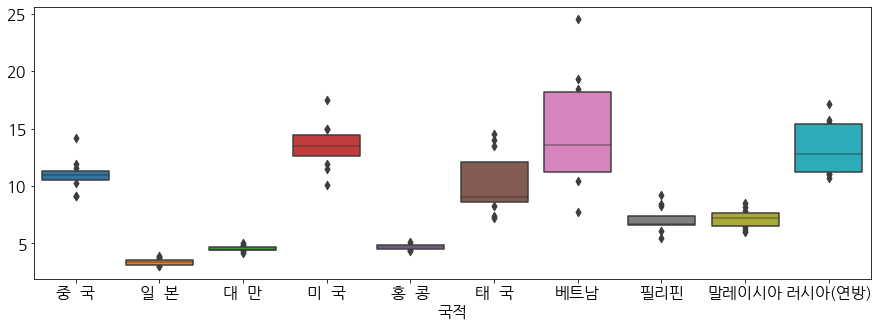

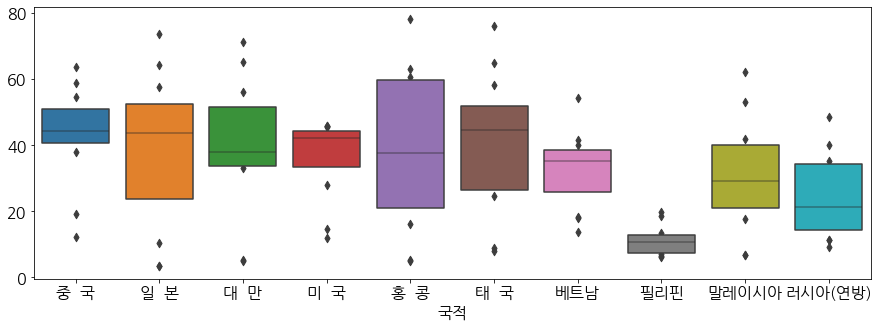

In [ ]:
#2019년 boxplot
plt.figure(figsize=(15,5))
sns.boxenplot(data=duration.iloc[:12,:])

#2020년 boxplot
plt.figure(figsize=(15,5))
sns.boxenplot(data=duration.iloc[12:,:])


In [ ]:
et1 = C_entrance['2019-01-01':'2019-11-01'] 
et1['year'] = et1.index.year
et1['month'] = et1.index.month

et2 = C_entrance['2020-01-01':'2020-11-01'] 
et2['year'] = et2.index.year
et2['month'] = et2.index.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
et1.head()

국적별,중 국,일 본,대 만,미 국,홍 콩,태 국,베트남,필리핀,말레이시아,러시아(연방),total,year,month
2019-01-01,392814,206526,87954,62737,35896,41334,20183,30473,22065,25194,925176,2019,1
2019-02-01,453379,213200,94559,57732,51312,39220,42181,29294,27484,20001,1028362,2019,2
2019-03-01,487623,375119,98510,84275,46068,53100,46991,38701,40789,27992,1299168,2019,3
2019-04-01,493250,290092,113072,102524,76104,69726,63169,66525,43726,34205,1352393,2019,4
2019-05-01,500413,286273,101779,95815,57026,52660,44416,50569,31217,32955,1253123,2019,5


In [ ]:
et2.tail()

국적별,중 국,일 본,대 만,미 국,홍 콩,태 국,베트남,필리핀,말레이시아,러시아(연방),total,year,month
2020-07-01,9738,755,305,11922,78,609,1060,10166,136,2004,36773,2020,7
2020-08-01,16275,1275,655,13368,167,781,1938,7362,276,2086,44183,2020,8
2020-09-01,15307,794,329,12426,115,523,1447,8485,186,1700,41312,2020,9
2020-10-01,11477,927,299,12366,59,460,853,9041,180,2240,37902,2020,10
2020-11-01,9174,1254,299,13100,89,391,1269,9700,168,1806,37250,2020,11


In [ ]:
et1.reset_index(inplace=True)
et2.reset_index(inplace=True)

resultpd = pd.DataFrame()
resultpd["month"] = et1.month[:11]
resultpd['2019'] = et1.total
resultpd['2020'] = et2.total

In [ ]:
resultpd

,month,2019,2020
0,1,925176,1086061
1,2,1028362,554852
2,3,1299168,53507
3,4,1352393,20303
4,5,1253123,19331
5,6,1234021,22092
6,7,1228138,36773
7,8,1337031,44183
8,9,1206164,41312
9,10,1375648,37902


In [ ]:
df1_weight = duration.copy()
df1_weight = duration * C_entrance.iloc[:,:-3]
df1_weight["total"] = df1_weight.sum(axis=1)
df1_weight['year'] = df1_weight.index.year
df1_weight['month'] = df1_weight.index.month

In [ ]:
et19 = df1_weight[df1_weight.year == 2019].iloc[:11].reset_index() # 12월 제외
et20 = df1_weight[df1_weight.year == 2020].reset_index() # columns 숫자 통일을 위해 reset

In [ ]:
resultpd["weighted_2019"] = et19.total
resultpd["weighted_2020"] = et20.total
resultpd

,month,2019,2020,weighted_2019,weighted_2020
0,1,925176,1086061,8.503191e+06,9.238205e+06
1,2,1028362,554852,8.681981e+06,4.678476e+06
2,3,1299168,53507,8.414780e+06,1.425323e+06
3,4,1352393,20303,9.369175e+06,8.289165e+05
4,5,1253123,19331,9.778638e+06,8.414208e+05
5,6,1234021,22092,9.675286e+06,8.684171e+05
6,7,1228138,36773,1.042601e+07,1.149211e+06
7,8,1337031,44183,1.163759e+07,1.568143e+06
8,9,1206164,41312,9.919965e+06,1.289773e+06
9,10,1375648,37902,9.704797e+06,1.195009e+06


In [ ]:
resultpd['입국자 전년대비 비율(%)'] = resultpd['2020'] / resultpd['2019'] *100
resultpd['weighted_입국자 전년대비 비율(%)'] = resultpd["weighted_2020"] / resultpd['weighted_2019'] *100

In [ ]:
resultpd.head()

,month,2019,2020,weighted_2019,weighted_2020,입국자 전년대비 비율(%),weighted_입국자 전년대비 비율(%)
0,1,925176,1086061,8.503191e+06,9.238205e+06,117.389664,108.643979
1,2,1028362,554852,8.681981e+06,4.678476e+06,53.954930,53.887197
2,3,1299168,53507,8.414780e+06,1.425323e+06,4.118559,16.938326
3,4,1352393,20303,9.369175e+06,8.289165e+05,1.501265,8.847273
4,5,1253123,19331,9.778638e+06,8.414208e+05,1.542626,8.604683


In [ ]:
income = income.rename(columns = {"관광수입(US$1,000,000)":"관광수입(US$1M)","증감률(%)":"전년대비 관광수입 비율(%)"})
income["date"] = pd.to_datetime(income["시점"],format='%Y%m',errors="ignore")

In [ ]:
income.drop(["시점"],axis=1,inplace=True)
income.head()

,관광수입(US$1M),전년대비 관광수입 비율(%),date
0,1548.8,24.8,2019-01-01
1,1554.4,21.7,2019-02-01
2,2227.9,40.1,2019-03-01
3,2098.0,22.4,2019-04-01
4,1923.6,19.1,2019-05-01


In [ ]:
resultpd["2020_전년대비 관광수입 비율(%)"]= 100+income[income["date"].dt.year == 2020]["전년대비 관광수입 비율(%)"].reset_index().drop(["index"],axis=1)
resultpd["2019_매출액"]= income["관광수입(US$1M)"][:11]
resultpd["2020_매출액"]= income["관광수입(US$1M)"][12:].reset_index().drop(["index"],axis=1)
resultpd["month"] = income["date"].dt.month[:11]
resultpd["weighted_2019"] = resultpd["weighted_2019"].astype('int64')
resultpd["weighted_2020"] = resultpd["weighted_2020"].astype('int64')

In [ ]:
resultpd.head()

,month,2019,2020,weighted_2019,weighted_2020,입국자 전년대비 비율(%),weighted_입국자 전년대비 비율(%),2020_전년대비 관광수입 비율(%),2019_매출액,2020_매출액
0,1,925176,1086061,8503190,9238204,117.389664,108.643979,101.99,1548.8,1579.7
1,2,1028362,554852,8681981,4678476,53.954930,53.887197,73.83,1554.4,1147.5
2,3,1299168,53507,8414780,1425322,4.118559,16.938326,32.76,2227.9,729.8
3,4,1352393,20303,9369174,828916,1.501265,8.847273,16.77,2098.0,351.8
4,5,1253123,19331,9778637,841420,1.542626,8.604683,22.18,1923.6,426.6


# 시각화

## 0. 상위 10개국 비율

In [ ]:
etc_2019 = 0
etc_2020 = 0
etc_total = 0
for i in range(10,61):
  etc_2019 += df2['2019년'].iloc[i]
  etc_2020 += df2['2020년'].iloc[i]
  etc_total += df2['계'].iloc[i]

etc = pd.Series([etc_2019, etc_2020, etc_total], index=['2019년','2020년','계'], name = '기 타')
df_2 = df2.head(10).append(etc)

In [ ]:
df_2.tail()

,2019년,2020년,계
국적별,,,
베트남,553731,80170,633901
필리핀,503867,105978,609845
말레이시아,408590,48289,456879
러시아(연방),343057,71124,414181
기 타,2682927,468078,3151005


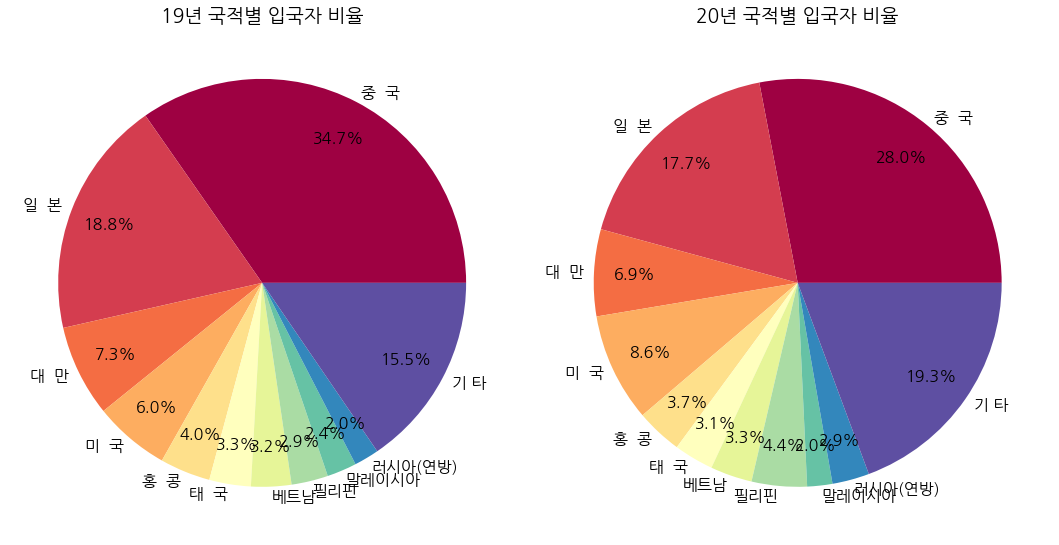

In [ ]:
plt.figure(figsize=[15, 8])

ratio_2019 = df_2['2019년']
labels = df_2.index
ratio_2020 = df_2['2020년']
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]

plt.subplot(1,2,1)
plt.title('19년 국적별 입국자 비율')
plt.pie(ratio_2019, labels=labels, autopct='%.1f%%',  labeldistance=1.05, pctdistance=.8, colors = colors)

plt.subplot(1,2,2)
plt.title('20년 국적별 입국자 비율')
plt.pie(ratio_2020, labels=labels, autopct='%.1f%%',  labeldistance=1.05, pctdistance=.8, colors = colors)
plt.tight_layout()
plt.show()

## 1. 코로나 확진자 수에 따른 외국인 입국자 수

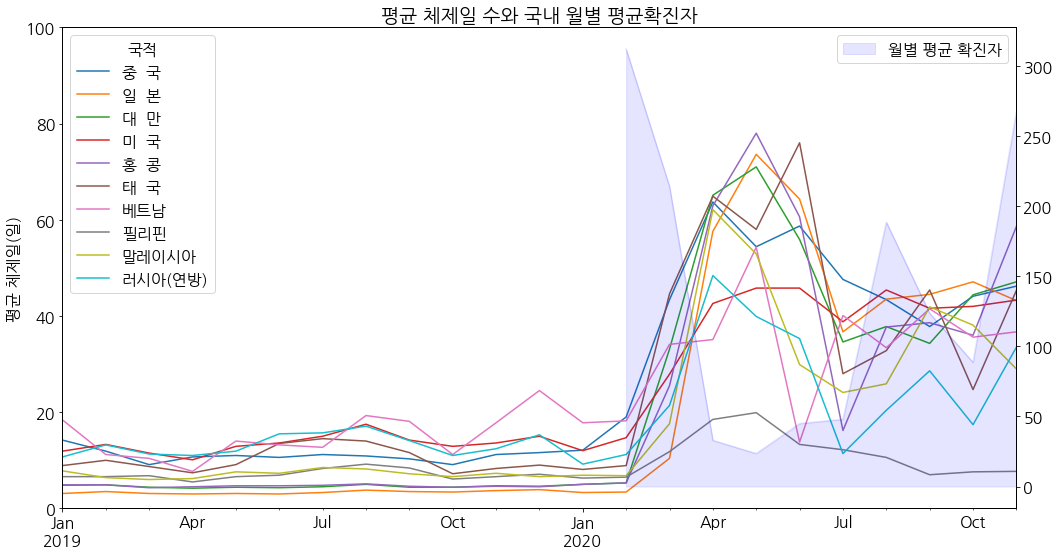

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(15,8),sharex=True)
ax2 = ax1.twinx()

plt.title('평균 체제일 수와 국내 월별 평균확진자')
duration.loc[:'2020-11-01'].plot(kind='line',ax=ax1,legend=True)
ax1.set_ylabel('평균 체제일(일)')
ax1.set_ylim(0,100)

CovidN.loc['2020-02-01':'2020-11-01'].plot(kind='area',secondary_y=True,ax=ax2,color='b',alpha=0.1,legend=False)
ax2.set_ylabel('확진자 수(명)')
plt.legend(loc='upper right')
ax2.set_xlim('2019-01-01','2020-11-01')

fig.tight_layout()
plt.show()


## 2. 외국인 관광객수와 관광 수입간의 관계

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)

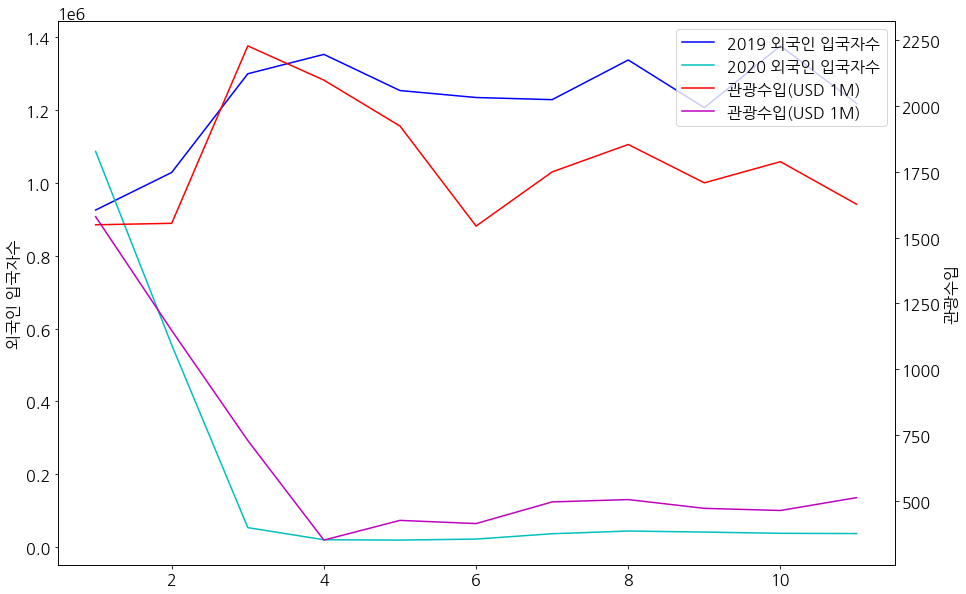

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1 = ax1.plot(resultpd["month"], resultpd["2019"],c='b',label="2019 외국인 입국자수")
line2 = ax1.plot(resultpd["month"], resultpd["2020"],c='c',label="2020 외국인 입국자수")
line3 = ax2.plot(resultpd["month"], resultpd["2019_매출액"],c="r",label="관광수입(USD 1M)")
line4 = ax2.plot(resultpd["month"], resultpd["2020_매출액"],c="m",label="관광수입(USD 1M)")
plt.xlabel('기간')
ax1.set_ylabel("외국인 입국자수")
ax2.set_ylabel("관광수입")

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.show()

## 3. 외국인 입국자 감소 비율과 매출 감소 비율  비교

In [ ]:
resultpd.head()

,month,2019,2020,weighted_2019,weighted_2020,입국자 전년대비 비율(%),weighted_입국자 전년대비 비율(%),2020_전년대비 관광수입 비율(%),2019_매출액,2020_매출액
0,1,925176,1086061,8503190,9238204,117.389664,108.643979,101.99,1548.8,1579.7
1,2,1028362,554852,8681981,4678476,53.954930,53.887197,73.83,1554.4,1147.5
2,3,1299168,53507,8414780,1425322,4.118559,16.938326,32.76,2227.9,729.8
3,4,1352393,20303,9369174,828916,1.501265,8.847273,16.77,2098.0,351.8
4,5,1253123,19331,9778637,841420,1.542626,8.604683,22.18,1923.6,426.6


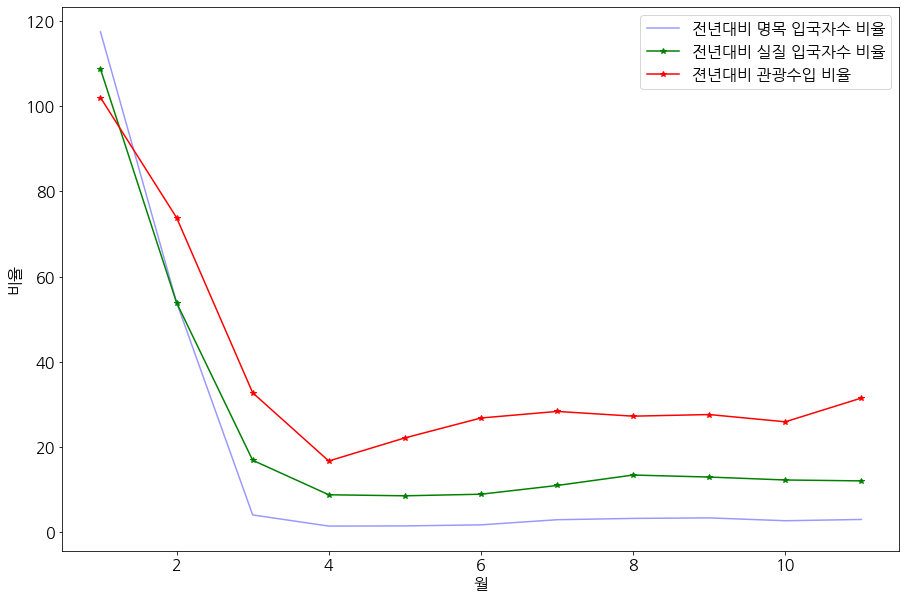

In [ ]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(resultpd["month"], resultpd["입국자 전년대비 비율(%)"],c='b',label="전년대비 명목 입국자수 비율",alpha=0.4 )
line2 = ax1.plot(resultpd["month"], resultpd["weighted_입국자 전년대비 비율(%)"],c='g',label="전년대비 실질 입국자수 비율", marker="*")
line3 = ax1.plot(resultpd["month"], resultpd["2020_전년대비 관광수입 비율(%)"],c="r",label="젼년대비 관광수입 비율", marker="*")
plt.xlabel('월')
ax1.set_ylabel("비율")

lines = line1+line2+line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
#ax1.title("2020 전년대비 변화")
plt.show()

## 4. 내국인 국내여행 연관성 팩트체크

In [ ]:
abroad = abroad.rename(columns = {"인원수(명)":"내국인출국수"})
abroad["시점"] = pd.to_datetime(abroad["시점"],format='%Y%m',errors="ignore")
abroad.head()

,시점,내국인출국수,전년동기인원수(명),증감률(%),diff
0,2019-01-01,2912331,2866780,1.6,-45551
1,2019-02-01,2617946,2311009,13.3,-306937
2,2019-03-01,2334153,2252565,3.6,-81588
3,2019-04-01,2246417,2230200,0.7,-16217
4,2019-05-01,2401204,2331565,3.0,-69639


In [ ]:
abroad['diff'] = abroad["전년동기인원수(명)"] - abroad["내국인출국수"]
abroad1 = abroad["diff"][12:].reset_index()
resultpd['adj_입국자 전년대비 비율(%)'] = (abroad1["diff"]*0.4+resultpd["weighted_2020"])/resultpd["weighted_2019"]*100
# 외국을 나가지 않은 한국인 중 40%정도는 국내 여행을 했을 것으로 추측

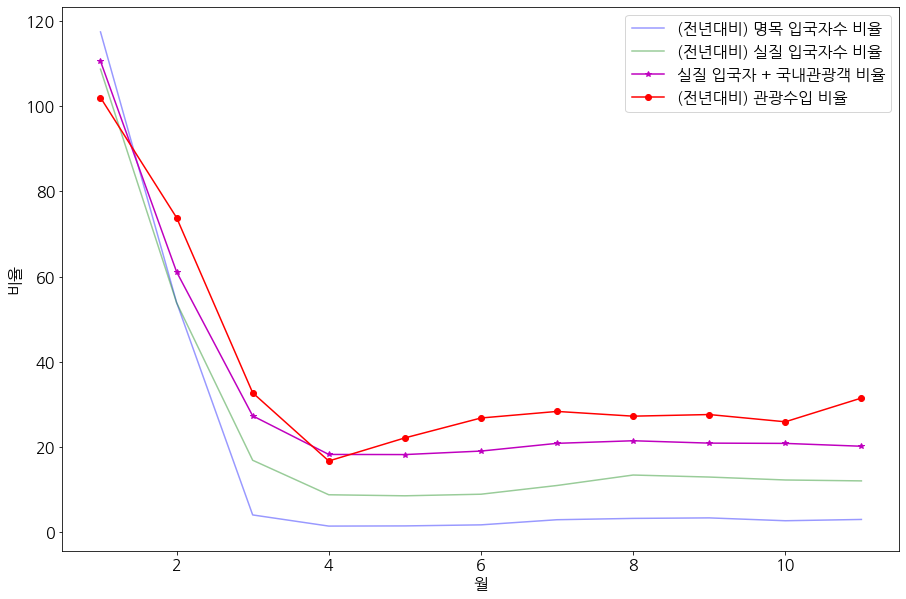

In [ ]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(resultpd["month"], resultpd["입국자 전년대비 비율(%)"],c='b',label="(전년대비) 명목 입국자수 비율",alpha=0.4 )
line2 = ax1.plot(resultpd["month"], resultpd["weighted_입국자 전년대비 비율(%)"],c='g',label="(전년대비) 실질 입국자수 비율", marker="",alpha=0.4)
line3 = ax1.plot(resultpd["month"], resultpd["adj_입국자 전년대비 비율(%)"],c="m",label="실질 입국자 + 국내관광객 비율", marker="*")
line4 = ax1.plot(resultpd["month"], resultpd["2020_전년대비 관광수입 비율(%)"],c="r",label="(전년대비) 관광수입 비율", marker="o")

plt.xlabel('월')
ax1.set_ylabel("비율")

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
#ax1.title("2020 전년대비 변화")
plt.show()